In [449]:
import random
import numpy as np


def rk4(dv,v,n,t,dt,e1,a,w):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1,a,w)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1,a,w)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1,a,w)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1,a,w)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v

def ecuaciones(v, dv,eps1,A,omega):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    #eps1, A, omega = 0.2,10,4.7
    eps2 = 1
    A=A*(1+4.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv


def dist(x,y,z,t1,t2):
    v1 = np.array([x[t1], y[t1], z[t1]])
    v2 = np.array([x[t2], y[t2], z[t2]])
    return np.linalg.norm(v1-v2)

def embedding(x,T):
    x1d=np.zeros(len(x))
    x2d=np.zeros(len(x))
    x0d=np.zeros(len(x))
    tau = int(T/24)
    for i in range(30,len(x)):
        x1d[i]=-x[i-tau]
        x2d[i]=-x[i-2*tau]
        x0d[i]=-x[i]
    return x0d,x1d,x2d

def close_returns(x,y,z,T):
    cr =  8 #cr de close returns
    # eps = 0.3
    eps = np.abs(np.max(x)-np.min(x))*0.05
    #print('eps2: ',eps2)
    randint1 = 1000
    x,y,z = embedding(x,T)
    for k in range(10):
        if (dist(x,y,z,int(T*k)+randint1,randint1) < eps):
            cr = k
        else:
            continue
    return cr

In [450]:
def integrar_cr(params):
    a = params[0]
    w = params[1]
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.
    v[1]=3.
    v[2]=2.
    #DT
    T = 2* np.pi / w
    dt = 2* np.pi /2000 / w
    num_muestras = T/dt
    t=0.0
    t_pre=0.0
    t_max=2000.0
    x=[]
    y=[]
    z=[]
    cont = 0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1,a,w)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    x = x[100*int(T):]
    y = y[100*int(T):]
    z = z[100*int(T):]
    cr = close_returns(x,y,z,num_muestras)
    #print(num_muestras)
    return cr

def integrar(params):
    a = params[0]
    w = params[1]
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.
    v[1]=3.
    v[2]=2.
    #DT
    T = 2* np.pi / w
    dt = 2* np.pi /2000 / w
    num_muestras = T/dt
    t=0.0
    t_pre=0.0
    t_max=2000.0
    x=[]
    y=[]
    z=[]
    cont = 0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1,a,w)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1
        
    x = x[100*int(T):]
    y = y[100*int(T):]
    z = z[100*int(T):]
    cr = close_returns(x,y,z,num_muestras)
    #print(num_muestras)
    return x,y,z,cr

## Pruebas

Pruebas

4


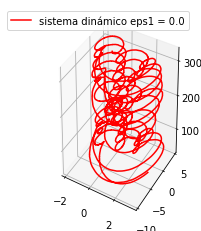

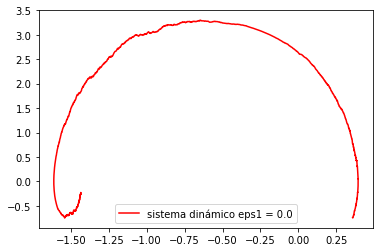

In [429]:
x,y,z,cr = integrar((10.5,4.8))
print(cr)

fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x[5400:100000],y[5400:100000], z[5400:100000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

fig=plt.figure()
ax=fig.add_subplot(111)
N = 6
T = 365
ax.plot(x[15400:15400+int(N*T)],y[15400:15400+int(N*T)] ,'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

In [430]:
import numpy as np
import random

def rk4(dv,v,n,t,dt,e1):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v


def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    A, eps2,omega = 10,1,4.7 #Cerca de la lengua de arnold de periodo 4, pero donde hay caos
    #A=A*(1+4.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv

for m in range(1):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    cont=0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    x = x[:60000]
    np.savetxt('Nino_cerca_de_periodo4_sin_ruido_'+str(m)+'.txt', x)

T = 2* np.pi /4.7
num_muestras = int(T/dt)
cr = close_returns(x,y,z,num_muestras)
print(cr)

4


In [431]:
x[6000]


0.41549332019896296

In [432]:
x[6000+int(num_muestras*4)]

0.2646657263275856

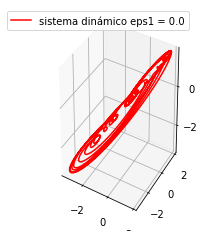

In [433]:
x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(30,len(x)):
    x1d[i]=-x[i-15]
    x2d[i]=-x[i-30]
    x0d[i]=-x[i]

fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[5000:14000],x1d[5000:14000], x2d[5000:14000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

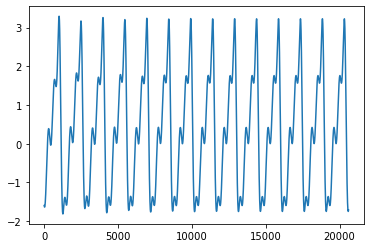

In [436]:
plt.plot(x[15000:100*356])

## Plot

In [40]:
import numpy as np
import pylab
import random
global t
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import pandas as pd
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
pi = np.pi


def dxdt(v,t,a,omega):
    x,z, tita= v[0], v[1], v[2]
    eps1,A, eps2,omega=0.2, a,1,omega
    eps1=eps1 #*(1+0.0*random.normalvariate(0,0.5))

    dxdt = z
    dzdt = x-z-x*x*x+x*z+eps1+A*np.cos(tita)+(eps2+0.*np.cos(tita))*x*x
    dtitadt = omega

    return [dxdt, dzdt, dtitadt]


#@title
t_total=400.0
dt=0.01
t = np.arange(0,t_total,0.01)
v0 = [0.1,0.0,0.0]

#@title
def periodo(x,z,T):
    n = 0
    dif = 1
    dif2, dif3, dif4 = 1, 1, 1
    while ((dif > 0.1) and (dif2 > 0.1)) or ((dif3 > 0.1) and (dif4 > 0.1)):
        x1 = x[-1]
        x2 = x[-1-int((n+1)*T/dt)]
        z1 = z[-1]
        z2 = z[-1-int((n+1)*T/dt)]
        dif = np.abs(x2 - x1)
        dif2 = np.abs(z2 - z1)
        x1b = x[-int(0.5*T/dt)]
        x2b = x[-int(0.5*T/dt)-int((n+1)*T/dt)]
        z1b = z[-int(0.5*T/dt)]
        z2b = z[-int(0.5*T/dt)-int((n+1)*T/dt)]
        dif3 = np.abs(x2b - x1b)
        dif4 = np.abs(z2b - z1b)
        n += 1
        if n == 10:
             break

    alpha = np.arctan2(z[-1-int((n+1)*T/dt):-1],x[-1-int((n+1)*T/dt):-1])
    alpha_deg = np.degrees(alpha)
    a = np.zeros(len(alpha_deg))
    for i in range(len(alpha_deg)):
      if alpha_deg[i] > 0:
        a[i] = alpha_deg[i]
      else:
        a[i] = alpha_deg[i] + 360

    cont = 0
    sum = 1
    for i in range(len(a)-n*9):
      if (360 - a[cont]) < 1:
        sum +=1
        cont = cont + 1
      else:
        cont = cont + 1


    return n, sum

#@title
def embedding(tau,dato):
     w = 3
     tau = tau
     embedding = dato[(np.arange(w)*(tau+1))+ np.arange(np.max(dato.shape[0] - (w-1)*(tau+1), 0)).reshape(-1,1)]
     dim1 = embedding[:,0]
     dim2 = embedding[:,1]
     dim3 = embedding[:,2]
     return dim1, dim2, dim3

def count_orbit(dato,embedding,T):
  orbitas = np.zeros(shape=(len(dato),2))
  df30 = embedding
  eps = np.abs((np.max(df30['dim1'])-np.min(df30['dim1'])))*0.01
  for m in range(len(dato)-5*int(T/dt)):
      orbita = 0
      for n in range(4):
         dif_x = np.abs(df30['dim1'][m+(1+n)*int(T/dt)] - df30['dim1'][m])
         dif_y = np.abs(df30['dim2'][m+(1+n)*int(T/dt)] - df30['dim2'][m])
         dif_z = np.abs(df30['dim2'][m+(1+n)*int(T/dt)] - df30['dim2'][m])
         dif_x2 = np.abs(df30['dim1'][m+(1+n)*int(T/dt) + int(0.1*(T/dt))] - df30['dim1'][m + int(0.1*(T/dt))])
         dif_y2 = np.abs(df30['dim2'][m+(1+n)*int(T/dt) + int(0.1*(T/dt))] - df30['dim2'][m + int(0.1*(T/dt))])
         dif_z2 = np.abs(df30['dim2'][m+(1+n)*int(T/dt) + int(0.1*(T/dt))] - df30['dim2'][m + int(0.1*(T/dt))])
         if (dif_x < eps) and (dif_y < eps) and ( dif_z < eps) and \
            (dif_x < eps) and (dif_y < eps) and ( dif_z < eps):
            orbita = n + 1
            orbitas[m] = [m,orbita]

      if orbita == 0:
        orbitas[m] = [m,0]
  return orbitas

def limpia_orbitas(dato,embedding,T):
  orbitas_completas = []
  orbitas = count_orbit(dato,embedding,T)
  #La función encuentra muchos puntos de la misma órbita, no sólo en inicial,
  #limpio el array de puntos consecutivos para quedarme con el inicial
  zero = np.array([0])
  aux1 = np.where(np.diff(np.where((orbitas.T[1] == 1))[0]) > 1)
  uno = np.concatenate((zero,aux1+np.ones(len(aux1))),axis=None)
  aux2 = np.where(np.diff(np.where((orbitas.T[1] == 2))[0]) > 1)
  dos = np.concatenate((zero,aux2+np.ones(len(aux2))),axis=None)
  aux3 = np.where(np.diff(np.where((orbitas.T[1] == 3))[0]) > 1)
  tres = np.concatenate((zero,aux3+np.ones(len(aux3))),axis=None)
  aux4 = np.where(np.diff(np.where((orbitas.T[1] == 4))[0]) > 1)
  cuatro = np.concatenate((zero,aux4+np.ones(len(aux4))),axis=None)
  orbitas1 = np.where((orbitas.T[1] == 1))[0][uno.astype(int)]
  orbitas2 = np.where((orbitas.T[1] == 2))[0][dos.astype(int)]
  orbitas3 = np.where((orbitas.T[1] == 3))[0][tres.astype(int)]
  orbitas4 = np.where((orbitas.T[1] == 4))[0][cuatro.astype(int)]
  orbitas_completas = [orbitas1,orbitas2, orbitas3, orbitas4] #[orbitas1,orbitas2, orbitas3, orbitas4]
  return orbitas_completas

def figura_3d(x1d,x2d,x3d,l,nf,T):
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111,projection = '3d')
  ax.set_xlim(-N, N)
  ax.set_ylim(-N, N)
  ax.set_zlim(-N, N)
  ax.set_xticks([-N, 0, N])
  ax.set_yticks([-N, 0, N])
  ax.set_zticks([-N, 0, N])
  ax.set_xlabel('x(n+2T)')
  ax.set_ylabel('x(n)')
  ax.set_zlabel('x(n+T)')
  l = l
  nf = nf
  #ax.plot(x[-nf-int(l*T/dt):-nf],[0]*len(x[-nf-int(l*T/dt):-nf]),z[-nf-int(l*T/dt):-nf],color='grey',alpha=1) #para el y, hay que decir que es un array de ceros
  ax.plot(x1d[-nf-int(l*T/dt):-nf],x2d[-nf-int(l*T/dt):-nf],x3d[-nf-int(l*T/dt):-nf],color='r')
  #plt.show()

  fig2 = plt.figure(figsize=(5,2))
  #ax = fig2.add_subplot(212)
  #ax.plot(np.cos(tita[-nf-int(l*T/dt):-nf]),'--',color='grey',alpha=1) #para el y, hay que decir que es un array de ceros
  ax1 = fig2.add_subplot(211)
  ax1.plot(np.cos(x[-nf-int(l*T/dt):-nf]),'-',color='grey',alpha=1)
  #ax.plot(x1d,x2d,x0d,color='r',alpha=0.5)
  #plt.show()
  return fig, fig2

def close_returns(senal):
    m = int(len(senal)*0.1) +2
    cr =  np.zeros((len(senal),m)) #cr de close returns
    eps = (np.max(senal)-np.min(senal))*0.005
    for j in range(m):
      for i in range(len(senal)-m):
        if (np.abs(senal[i+j] - senal[i]) < eps) and \
            (np.abs(senal[i+2+j] - senal[i+2]) < eps):
          cr[i,j] = 1
    return cr

def plot_dosytres(orbitas,df30):
    subplot_count = 0
    fig = plt.figure(figsize=(12, 20))
    fig.subplots_adjust(hspace = .3, wspace=.2)

    orbitas1 = orbitas[0]
    orbitas2 = orbitas[1]
    orbitas3 = orbitas[2]
    orbitas4 = orbitas[3]

        #Orbitas T = 2
    for k in range(len(orbitas2)):
        ax = fig.add_subplot(8, 4, 1+k, projection='3d')
        orb = orbitas2[k-1]
        ax.plot(df30['dim1'][orb:orb+2*Tn],
                df30['dim2'][orb:orb+2*Tn],
                df30['dim3'][orb:orb+2*Tn],'b')
        ax.set_xlim(23,30)
        ax.set_ylim(23,30)
        ax.set_zlim3d(23,30)
        ax.set_xlabel('x')
        ax.set_ylabel('x + T')
        ax.set_zlabel('x + 2T')
        dedos = k


        #Orbitas T = 3
        for j in range(len(orbitas3)):
            ax = fig.add_subplot(8, 4, dedos+2+j, projection='3d')
            orb = orbitas3[j-1]
            ax.plot(df30['dim1'][orb:orb+3*Tn],
                    df30['dim2'][orb:orb+3*Tn],
                    df30['dim3'][orb:orb+3*Tn],'orange')
            ax.set_xlim(23,30)
            ax.set_ylim(23,30)
            ax.set_zlim3d(23,30)
            ax.set_xlabel('x')
            ax.set_ylabel('x + T')
            ax.set_zlabel('x + 2T')


    fig.suptitle('Simulación # '+str(sim+1),y=0.9)
    return fig

def plot_dosytres_SLR(orbitas,df30,Tn):
    subplot_count = 0
    fig = plt.figure(figsize=(12, 20))
    fig.subplots_adjust(hspace = .3, wspace=.2)

    x0d =  df30['dim1']
    orbitas2 = orbitas[1]
    orbitas3 = orbitas[2]
        #Orbitas T = 2
    for k in range(len(orbitas2)):
        ax = fig.add_subplot(8, 3, 1+k)
        orb = orbitas2[k]
        ax.plot(t[orb:orb+Tn],x0d[orb:orb+Tn],color='b',alpha=1)
        ax.plot(t[orb:orb+Tn],x0d[orb+Tn:orb+2*Tn],color='b',alpha=1)
        dedos = k

        #Orbitas T = 3
    for j in range(len(orbitas3)):
        ax = fig.add_subplot(8, 3, dedos+2+j)
        orb = orbitas3[j]
        ax.plot(t[orb:orb+Tn],x0d[orb:orb+Tn],color='orange',alpha=1)
        ax.plot(t[orb:orb+Tn],x0d[orb+Tn:orb+2*Tn],color='orange',alpha=1)
        ax.plot(t[orb:orb+Tn],x0d[orb+2*Tn:orb+3*Tn],color='orange',alpha=1)

    fig.suptitle('Simulación # '+str(sim+1),y=0.9)
    return fig

def plot_dosytres_LN(orbitas,df30,Tn,num,col):
    fig = plt.figure(figsize=(18, 25))
    fig.subplots_adjust(hspace = .3, wspace=.2)
    subplot_count_a = 0
    x0d =  df30['dim1']
    orbitas2 = orbitas[0]
    orbitas3 = orbitas[num-1]
    len2 = len(orbitas2)
    len3 = len(orbitas3)
        #Orbitas T = 2
    for k in range(len(orbitas3)):
        #Orbitas T = 3
        subplot_count_a += 1
        subplot_count = subplot_count_a
        orb3 = orbitas3[k]
        for j in range(len(orbitas2)):
          orb2 = orbitas2[j]
          ax = fig.add_subplot(len3,len2, subplot_count)
          ax.plot(t[0:Tn],x0d[orb3:orb3+Tn],color=col,alpha=1)
          ax.plot(t[0:Tn],x0d[orb3+Tn:orb3+2*Tn],color=col,alpha=1)
          ax.plot(t[0:Tn],x0d[orb3+(num-1)*Tn:orb3+num*Tn],color=col,alpha=1)
          ax.plot(t[0:Tn],x0d[orb2:orb2+Tn],color='g',alpha=1)
          #ax.plot(t[0:Tn],x0d[orb2+Tn:orb2+2*Tn],color='b',alpha=1)
          #ax.set_ylim(23,30)
          subplot_count += len3

    fig.suptitle('Orbitas inestables del atractor modelado (LN)',y=0.9)
    return fig


#@title
aes = np.arange(7,12,0.01)
omegas = np.arange(3,6,0.01)
A2 = np.zeros(shape=(len(omegas),len(aes)))
B2 = np.zeros(shape=(len(omegas),len(aes)))
A2.shape

#@title
cont = 0
for i in range(len(omegas)):
    for j in range(len(aes)):
        a, omega = aes[j], omegas[i]
        T = 2*pi/omega
        sol = odeint(dxdt,v0,t,args=(a,omega))
        #soluciones.append(sol)
        n, s = periodo(sol[:,0],sol[:,1],T)
        A2[i,j] = n
        B2[i,j] = s
        cont +=1
        
        
        


In [61]:
np.savetxt('/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/lengua_arnold_final.txt', A2, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

([<matplotlib.axis.YTick at 0x163cdbf70>,
 [Text(0, 7.0, '7.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 8.0, '8.0'),
  Text(0, 8.5, '8.5'),
  Text(0, 9.0, '9.0'),
  Text(0, 9.5, '9.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 10.5, '10.5'),
  Text(0, 11.0, '11.0'),
  Text(0, 11.5, '11.5'),
  Text(0, 12.0, '12.0')])

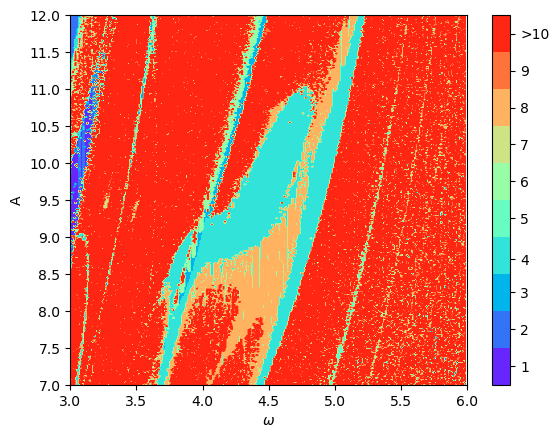

In [62]:
#Ticks cada 20 
A_array_lab = np.round(np.arange(7,12.5,0.5),1)
omega_array_lab = np.round(np.arange(3,6.5,0.5),1)
#Ticks cada 20 
A_array_tick = np.round(np.arange(7,12.5,0.5),1)
omega_array_tick = np.round(np.arange(3,6.5,0.5),1)

levels = MaxNLocator(nbins=10).tick_values(0, 10)
cmap = plt.get_cmap('rainbow')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig = plt.figure()
ax = plt.subplot(111)
X,Y= np.meshgrid(omegas,aes)
#Z = griddata((aes, omegas), A, (X, Y),method='nearest')
im = ax.contourf(X,Y,A2.T, levels=levels ,cmap = cmap)
#plt.pcolormesh(X, Y, A, cmap = 'Greys', rasterized=True, vmin=1, vmax=6)
ax.set_xlabel('$\omega$')
ax.set_ylabel('A')
cbar = fig.colorbar(im, ticks=[0.5, 1.5, 2.5,3.4,4.5,5.5,6.5,7.5,8.5,9.5])
cbar.ax.set_yticklabels(['1', '2', '3','4','5','6','7','8','9','>10'])  # vertically oriented colorbar
plt.xticks(omega_array_tick, omega_array_lab,rotation=0)
plt.yticks(A_array_tick, A_array_lab)